In [1]:
# Import the necessary libraries if you are starting a new notebook.
# Import the necessary libraries.h
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
# What should we do with the customer_id column?
-- # delete them if we are not makng an analysis of indiviual customer

In [15]:
# Load the continuous and discrete variables into numericals_df and categorical_df variables
numericals_df = customer_df.select_dtypes(include=[np.number])
categorical_df = customer_df.select_dtypes("object")
categorical_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


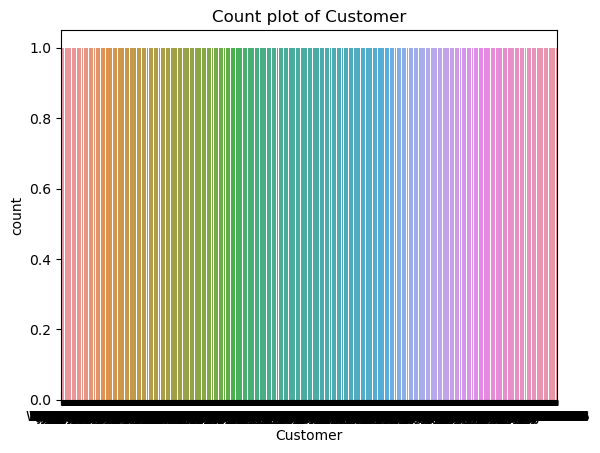

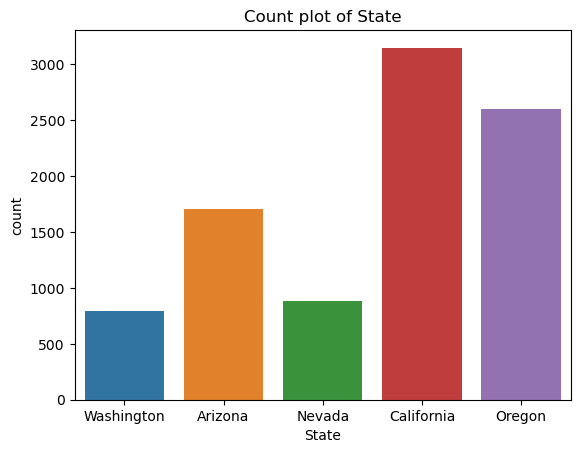

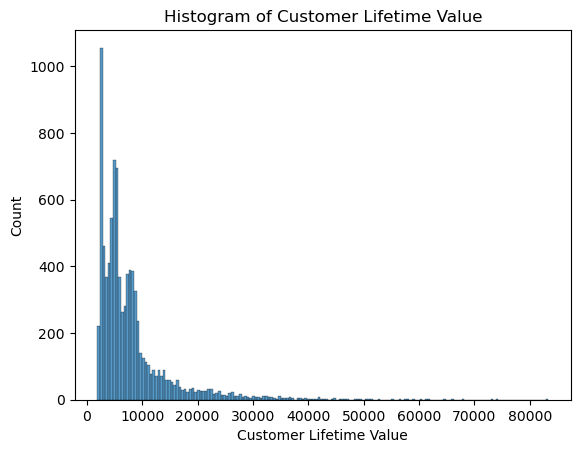

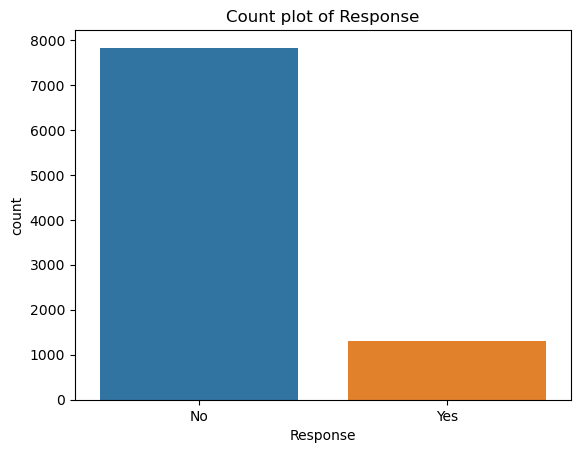

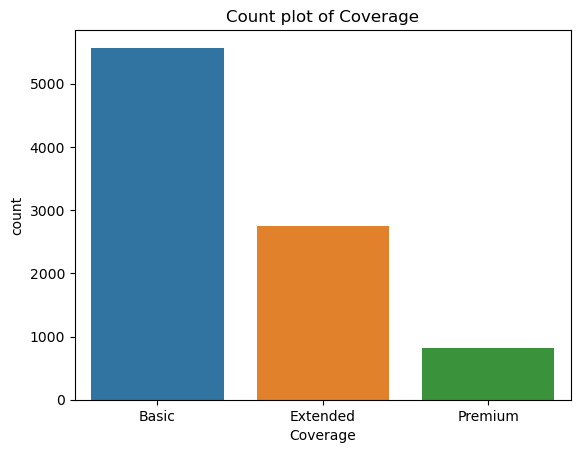

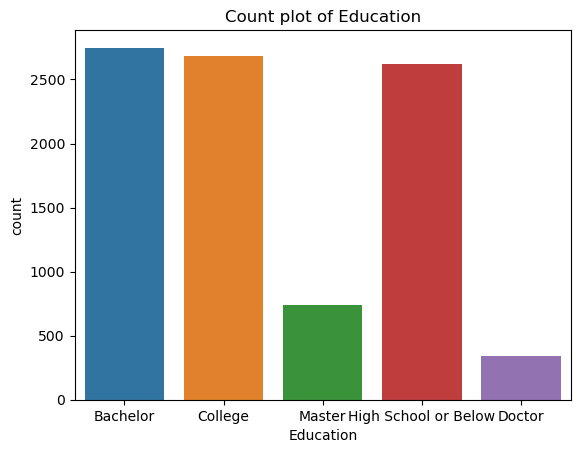

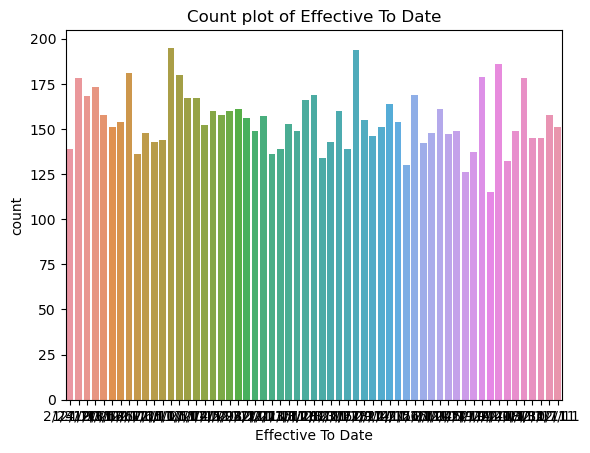

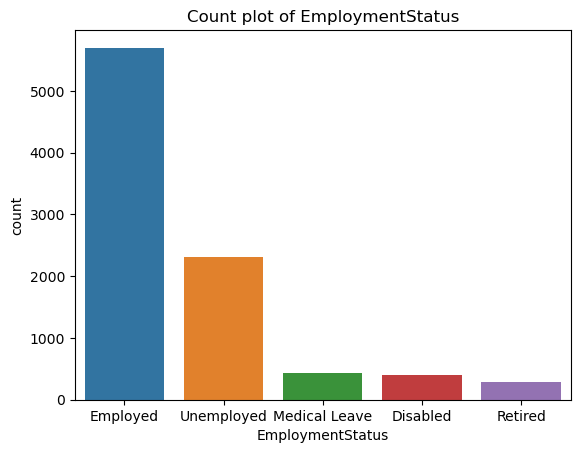

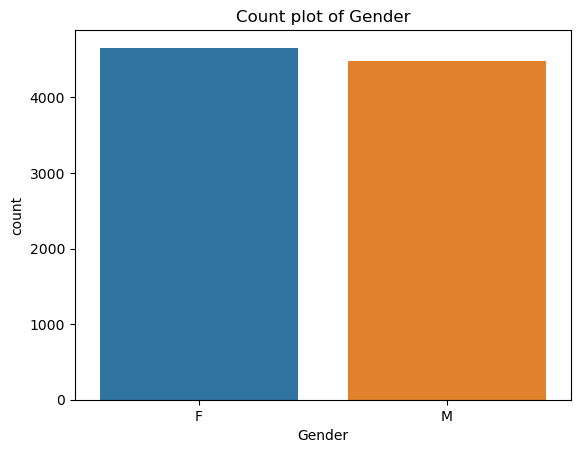

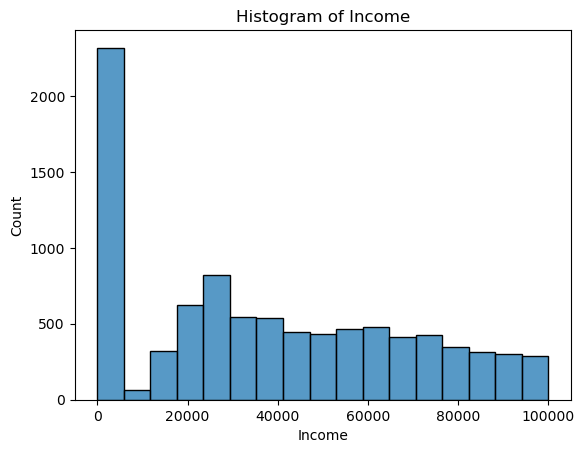

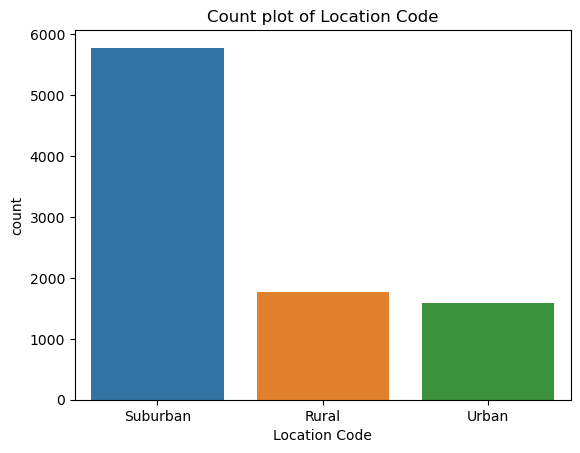

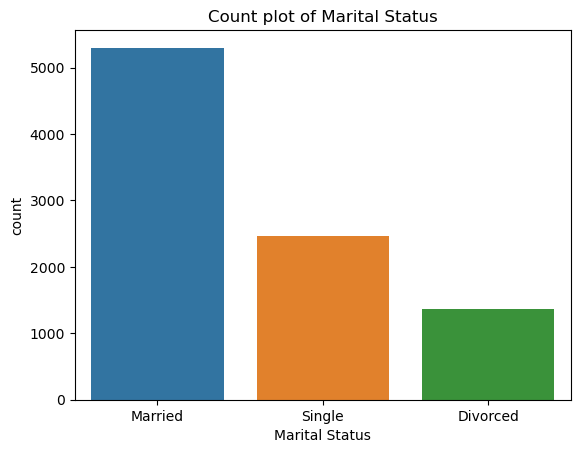

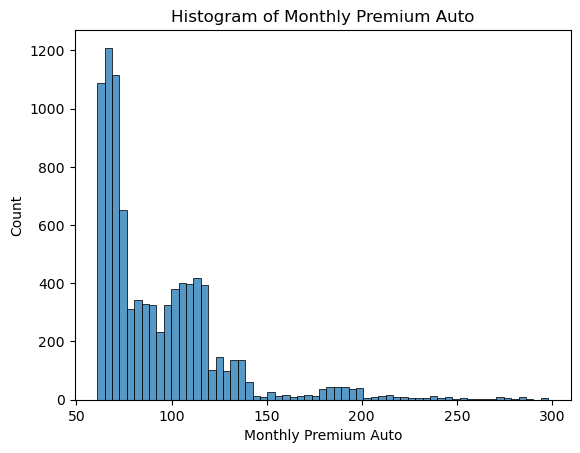

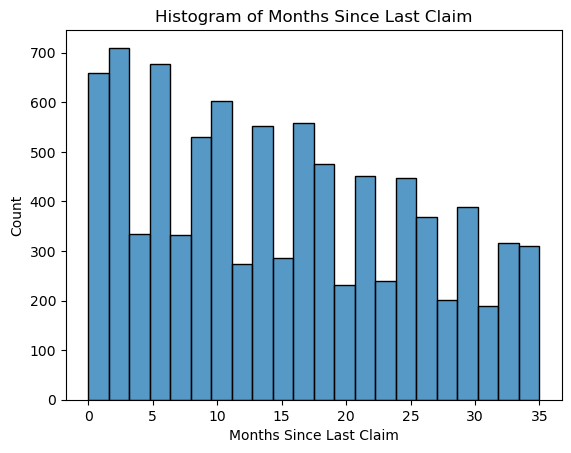

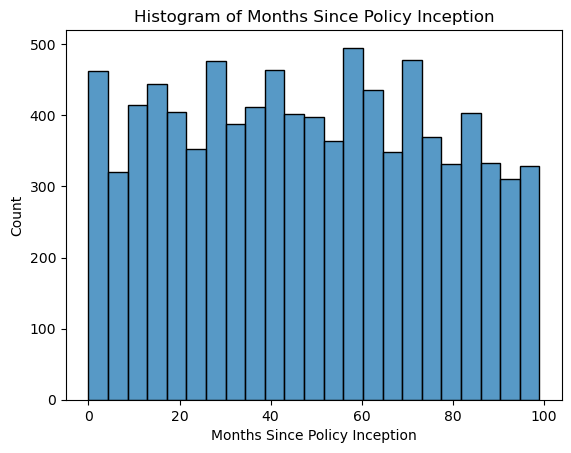

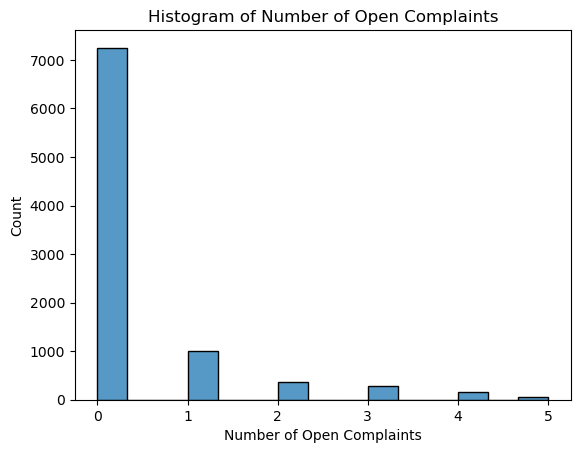

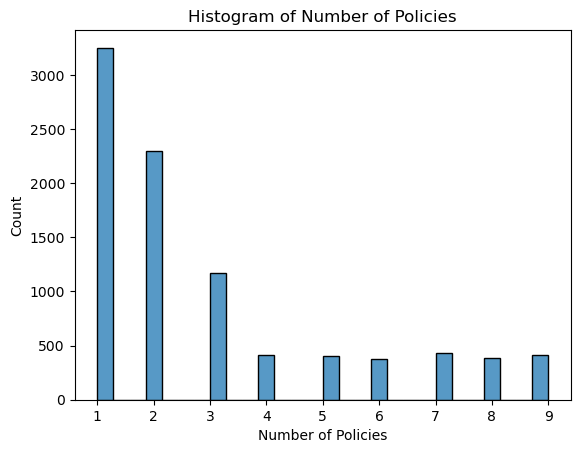

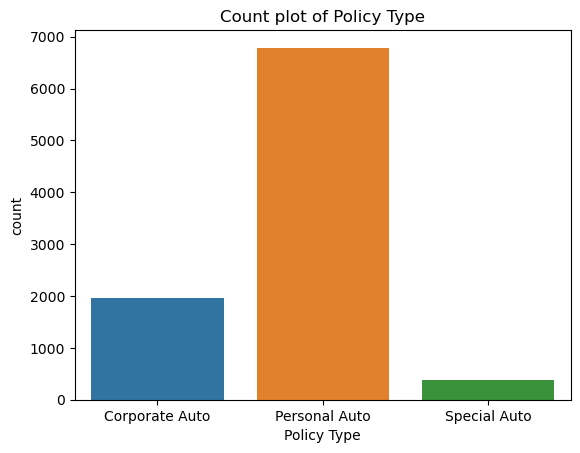

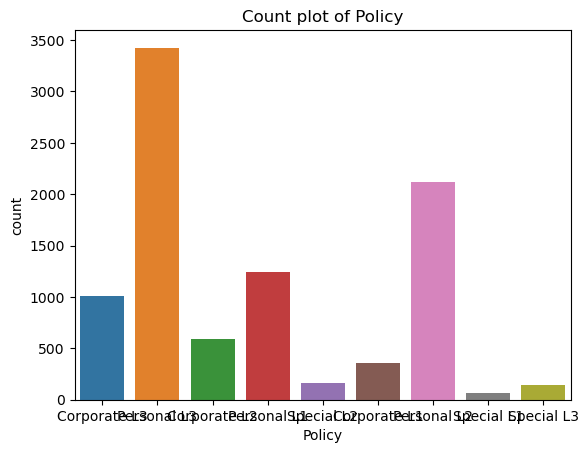

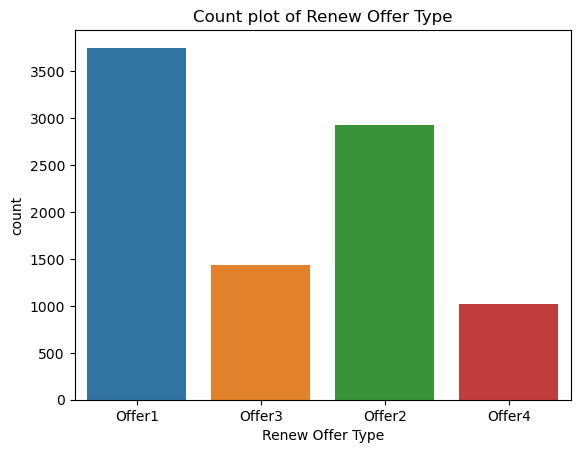

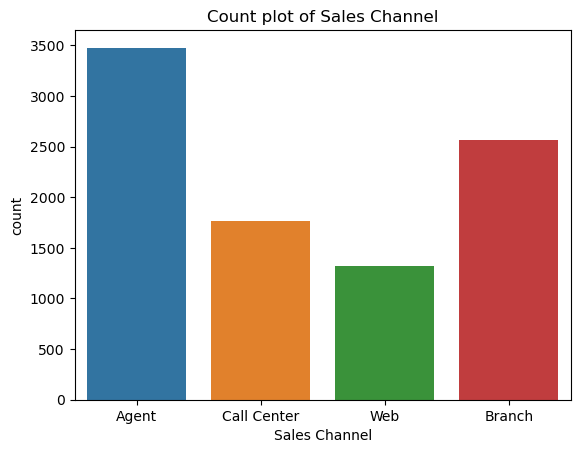

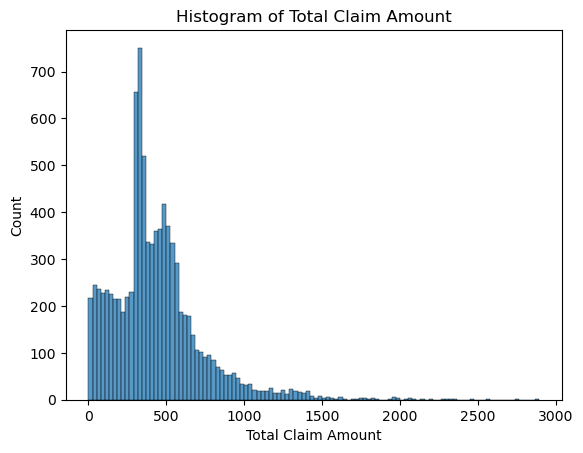

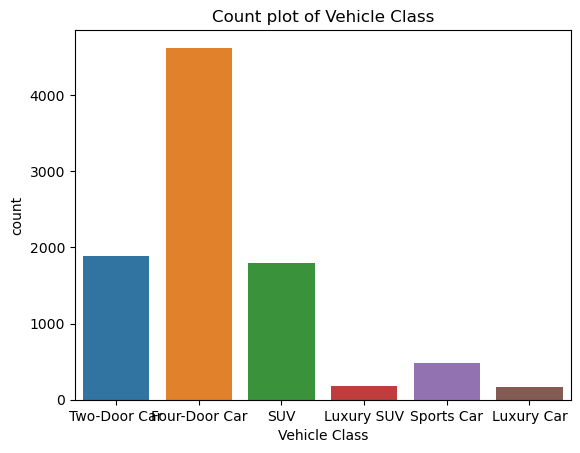

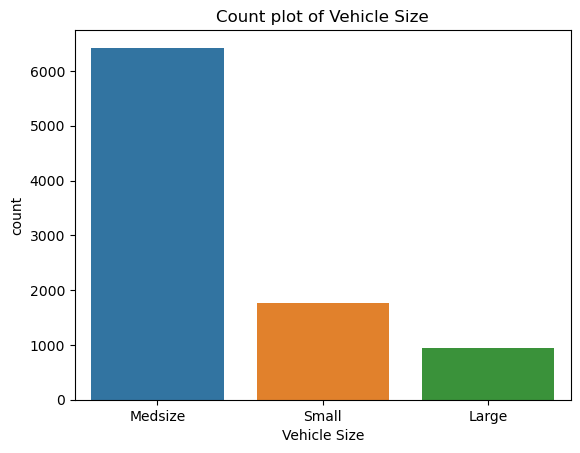

In [16]:
# Plot every categorical variable. What can you see in the plots?
# Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in
# the column on the x-axis and an appropriate measure on the y-axis. However,
#this time you will try a different plot. This time in each plot for the categorical variable you will have,
#each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
for column in customer_df.columns:

    # Create a count plot for categorical columns
    if customer_df[column].dtype == 'object':
        plt.figure()
        sns.countplot(x=column, data=customer_df)
        plt.title(f'Count plot of {column}')

    # Create a histogram for numerical columns
    else:
        plt.figure()
        sns.histplot(x=column, data=customer_df)
        plt.title(f'Histogram of {column}')

    # Show the plot
    plt.show()

In [18]:
#For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

def count_values(df):
    for column in df.columns:
        print(f"\n{column}:")
        print(df[column].value_counts().to_string())

# Call the count_values function on the data frame
count_values(categorical_df)



Customer:
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
DB50188    1
DG23204    1
JS64688    1
IW56740    1
AQ30231    1
AK44985    1
FX55409    1
BK76107    1
AY26056    1
QR36329    1
GF70857    1
MU97512    1
OH98172    1
PD22502    1
US36532    1
JR84006    1
FN66436    1
YX84828    1
JH94846    1
TX73398    1
RX45809    1
RN86953    1
NX32730    1
RZ50353    1
QP32003    1
WN91943    1
BR24590    1
UI57491    1
UJ70796    1
QE46704    1
XF94560    1
VQ82774    1
EO87464    1
CR86548    1
XO11574    1
DM34321    1
WH56217    1
BV55733    1
PK37121    1
UF49068    1
FL55134    1
CH20044    1
NU57274    1
CV63337    1
GY87675    1
OH93496    1
AY99324    1
OL48469    1
OA26316    1
HZ64168    1
CR20811    1
FT79229    1
EI17753    1
EV15646    1
FF38892    1
PP35705    1
FQ24781    1
XT55646    1
QF69163    1
JH30819    1
YV88022    1
VF57165    1
AZ36763    1
FL50532    1
JP88955    1
AD33971    1
ES88339    1
NT79981    1
KO73340    1
LT98784    1
OQ45659    1
Z